In [1]:
import pandas as pd
from sqlalchemy import create_engine # database connection
import datetime as dt
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
disk_engine = create_engine('sqlite:///project1.db') #Create/connect to a database

/home/olly/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [13]:
pd.set_option('display.max_columns', 500) #Allow more than default columns to be displayed (lot of features)
display(pd.read_csv('./data/projects.csv', nrows=1))  #Just read one row for speed
display(pd.read_csv('./data/donations.csv', nrows=1))  #Just read one row for speed
display(pd.read_csv('./data/essays.csv', nrows=1))  #Just read one row for speed
display(pd.read_csv('./data/outcomes.csv', nrows=1))  #Just read one row for speed
display(pd.read_csv('./data/resources.csv', nrows=1))  #Just read one row for speed

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,school_district,school_county,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,teacher_prefix,teacher_teach_for_america,teacher_ny_teaching_fellow,primary_focus_subject,primary_focus_area,secondary_focus_subject,secondary_focus_area,resource_type,poverty_level,grade_level,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,eligible_almost_home_match,date_posted
0,316ed8fb3b81402ff6ac8f721bb31192,42d43fa6f37314365d08692e08680973,c0e6ce89b244764085691a1b8e28cb81,63627006187,36.57634,-119.608713,Selma,CA,93662,NaN,Selma Unified Sch District,Fresno,f,f,f,f,f,f,Mrs.,f,f,Literature & Writing,Literacy & Language,College & Career Prep,Applied Learning,Books,highest poverty,Grades 6-8,30,555.81,653.89,32,f,f,2014-05-12


,donationid,projectid,donor_acctid,donor_city,donor_state,donor_zip,is_teacher_acct,donation_timestamp,donation_to_project,donation_optional_support,donation_total,dollar_amount,donation_included_optional_support,payment_method,payment_included_acct_credit,payment_included_campaign_gift_card,payment_included_web_purchased_gift_card,payment_was_promo_matched,via_giving_page,for_honoree,donation_message
0,431d720bc3dfd75ae445a5eaa0b0638d,ffffac55ee02a49d1abc87ba6fc61135,22cbc920c9b5fa08dfb331422f5926b5,Peachtree City,GA,30269,f,2011-08-25 14:27:34.807,42.5,7.5,50,10_to_100,t,no_cash_received,f,t,f,f,f,f,I gave to this project because I support the e...


,projectid,teacher_acctid,title,short_description,need_statement,essay
0,ffffc4f85b60efc5b52347df489d0238,c24011b20fc161ed02248e85beb59a90,iMath,It is imperative that teachers bring technolog...,My students need four iPods.,I am a fourth year fifth grade math teacher. T...


,projectid,is_exciting,at_least_1_teacher_referred_donor,fully_funded,at_least_1_green_donation,great_chat,three_or_more_non_teacher_referred_donors,one_non_teacher_referred_donor_giving_100_plus,donation_from_thoughtful_donor,great_messages_proportion,teacher_referred_count,non_teacher_referred_count
0,ffffc4f85b60efc5b52347df489d0238,f,NaN,f,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN


,resourceid,projectid,vendorid,vendor_name,project_resource_type,item_name,item_number,item_unit_price,item_quantity
0,8a1c1c45bc30d065061912fd9114fcf3,ffffc4f85b60efc5b52347df489d0238,430,Woodwind and Brasswind,Technology,iPod nano 4th Gen 8GB (Black),249995.001,149,4


In [7]:
#Insert projects into db
start = dt.datetime.now()
chunksize = 100000
j = 0
index_start = 1

for df in pd.read_csv('./data/projects.csv', chunksize=chunksize, iterator=True, encoding='utf-8'):
    
    df = df.rename(columns={c: c.replace(' ', '') for c in df.columns}) # Remove spaces from columns

    df['date_posted'] = pd.to_datetime(df['date_posted']) # Convert to datetimes

    df.index += index_start

    
    j+=1
    print '{} seconds: completed {} rows'.format((dt.datetime.now() - start).seconds, j*chunksize)

    df.to_sql('projects', disk_engine, if_exists='append')
    index_start = df.index[-1] + 1

print "fin"

1 seconds: completed 100000 rows
19 seconds: completed 200000 rows
36 seconds: completed 300000 rows
53 seconds: completed 400000 rows
70 seconds: completed 500000 rows
87 seconds: completed 600000 rows
104 seconds: completed 700000 rows


In [18]:
#Insert donations into db
start = dt.datetime.now()
chunksize = 100000
j = 0
index_start = 1

for df in pd.read_csv('./data/donations.csv', chunksize=chunksize, iterator=True, encoding='utf-8'):
    
    df = df.rename(columns={c: c.replace(' ', '') for c in df.columns}) # Remove spaces from columns

    df['donation_timestamp'] = pd.to_datetime(df['donation_timestamp']) # Convert to datetimes

    df.index += index_start

    
    j+=1
    print '{} seconds: completed {} rows'.format((dt.datetime.now() - start).seconds, j*chunksize)

    df.to_sql('donations', disk_engine, if_exists='append')
    index_start = df.index[-1] + 1

print "fin"

1 seconds: completed 100000 rows
14 seconds: completed 200000 rows
28 seconds: completed 300000 rows
40 seconds: completed 400000 rows
55 seconds: completed 500000 rows
68 seconds: completed 600000 rows
81 seconds: completed 700000 rows
93 seconds: completed 800000 rows
106 seconds: completed 900000 rows
119 seconds: completed 1000000 rows
132 seconds: completed 1100000 rows
145 seconds: completed 1200000 rows
157 seconds: completed 1300000 rows
170 seconds: completed 1400000 rows
183 seconds: completed 1500000 rows
196 seconds: completed 1600000 rows
208 seconds: completed 1700000 rows
221 seconds: completed 1800000 rows
234 seconds: completed 1900000 rows
247 seconds: completed 2000000 rows
259 seconds: completed 2100000 rows
273 seconds: completed 2200000 rows
285 seconds: completed 2300000 rows
298 seconds: completed 2400000 rows
311 seconds: completed 2500000 rows
323 seconds: completed 2600000 rows
336 seconds: completed 2700000 rows
349 seconds: completed 2800000 rows
362 second

In [16]:
#Insert essays into db
start = dt.datetime.now()
chunksize = 100000
j = 0
index_start = 1

for df in pd.read_csv('./data/essays.csv', chunksize=chunksize, iterator=True, encoding='utf-8'):
    
    df = df.rename(columns={c: c.replace(' ', '') for c in df.columns}) # Remove spaces from columns

    df.index += index_start

    
    j+=1
    print '{} seconds: completed {} rows'.format((dt.datetime.now() - start).seconds, j*chunksize)

    df.to_sql('essays', disk_engine, if_exists='append')
    index_start = df.index[-1] + 1

print "fin"    

2 seconds: completed 50000 rows
11 seconds: completed 100000 rows
21 seconds: completed 150000 rows
30 seconds: completed 200000 rows
44 seconds: completed 250000 rows
53 seconds: completed 300000 rows
63 seconds: completed 350000 rows
74 seconds: completed 400000 rows
83 seconds: completed 450000 rows
93 seconds: completed 500000 rows
102 seconds: completed 550000 rows
111 seconds: completed 600000 rows
120 seconds: completed 650000 rows
127 seconds: completed 700000 rows
fin


In [19]:
#Insert resources into db
start = dt.datetime.now()
chunksize = 100000
j = 0
index_start = 1

for df in pd.read_csv('./data/resources.csv', chunksize=chunksize, iterator=True, encoding='utf-8'):
    
    df = df.rename(columns={c: c.replace(' ', '') for c in df.columns}) # Remove spaces from columns

    df.index += index_start

    
    j+=1
    print '{} seconds: completed {} rows'.format((dt.datetime.now() - start).seconds, j*chunksize)

    df.to_sql('resources', disk_engine, if_exists='append')
    index_start = df.index[-1] + 1

print "fin"    

1 seconds: completed 100000 rows
7 seconds: completed 200000 rows
13 seconds: completed 300000 rows
19 seconds: completed 400000 rows
25 seconds: completed 500000 rows
31 seconds: completed 600000 rows
37 seconds: completed 700000 rows
43 seconds: completed 800000 rows
49 seconds: completed 900000 rows
55 seconds: completed 1000000 rows
61 seconds: completed 1100000 rows
67 seconds: completed 1200000 rows
73 seconds: completed 1300000 rows
79 seconds: completed 1400000 rows
86 seconds: completed 1500000 rows
92 seconds: completed 1600000 rows
98 seconds: completed 1700000 rows
104 seconds: completed 1800000 rows
110 seconds: completed 1900000 rows
116 seconds: completed 2000000 rows
122 seconds: completed 2100000 rows
128 seconds: completed 2200000 rows
134 seconds: completed 2300000 rows
140 seconds: completed 2400000 rows
146 seconds: completed 2500000 rows
153 seconds: completed 2600000 rows
158 seconds: completed 2700000 rows
164 seconds: completed 2800000 rows
172 seconds: complet

In [ ]:
#Insert outcomes into db
start = dt.datetime.now()
chunksize = 100000
j = 0
index_start = 1

for df in pd.read_csv('./data/outcomes.csv', chunksize=chunksize, iterator=True, encoding='utf-8'):
    
    df = df.rename(columns={c: c.replace(' ', '') for c in df.columns}) # Remove spaces from columns

    df.index += index_start

    
    j+=1
    print '{} seconds: completed {} rows'.format((dt.datetime.now() - start).seconds, j*chunksize)

    df.to_sql('outcomes', disk_engine, if_exists='append')
    index_start = df.index[-1] + 1

print "fin"
    

In [2]:
df = pd.read_sql_query('SELECT school_latitude,school_longitude,poverty_level FROM projects', disk_engine)

df.head()

,school_latitude,school_longitude,poverty_level
0,36.576340,-119.608713,highest poverty
1,32.911179,-96.723640,highest poverty
2,45.166039,-122.414576,high poverty
3,40.641727,-73.965655,highest poverty
4,34.043939,-118.288371,highest poverty


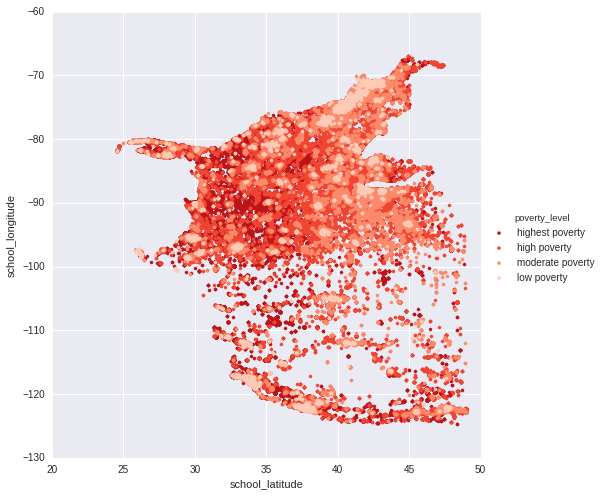

In [3]:
ax = sns.FacetGrid(df, hue="poverty_level",size=7,palette="Reds_r") \
   .map(plt.scatter, "school_latitude", "school_longitude",s=10) \
   .add_legend()

ax.set(ylim=(-130,-60))
ax.set(xlim=(20,50))

In [ ]:
disk_engine.execute('CREATE INDEX pid_index_projects on projects (projectid);')
disk_engine.execute('CREATE INDEX pid_index_outcomes on outcomes (projectid);')
disk_engine.execute('CREATE INDEX pid_index_essays on essays (projectid);')
disk_engine.execute('CREATE INDEX pid_index_donations on donations (projectid);')
disk_engine.execute('CREATE INDEX pid_index_resources on resources (projectid);')

In [8]:
df_poverty = pd.read_sql_query('SELECT poverty_level, is_exciting FROM projects JOIN outcomes ON projects.projectid = outcomes.projectid',disk_engine)

#Could have done this with SQL. Pandas/SQL comparision - http://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html
df_poverty.groupby('poverty_level').size()

poverty_level
high poverty        161937
highest poverty     358324
low poverty          15268
moderate poverty     83797
dtype: int64

In [5]:
df_essay_length = pd.read_sql_query('SELECT projectid, length(essay) from essays',disk_engine)
df_essay_length = df_essay_length.sort_values(by = 'projectid')
df_essay_length = df_essay_length.set_index('projectid')
df_essay_length.head()

,length(essay)
projectid,
00001ccc0e81598c4bd86bacb94d7acb,1453
00002bff514104264a6b798356fdd893,1698
00002d691c05c51a5fdfbb2baef0ba25,1273
0000b38bbc7252972f7984848cf58098,2036
0000ee613c92ddc5298bf63142996a5c,2375


In [3]:
df_targets = pd.read_sql_query('SELECT projectid, is_exciting from outcomes',disk_engine)
df_targets = df_targets.sort_values(by = 'projectid')
df_targets = df_targets.set_index('projectid')
df_targets.head()

,is_exciting
projectid,
00001ccc0e81598c4bd86bacb94d7acb,f
00001ccc0e81598c4bd86bacb94d7acb,f
00002bff514104264a6b798356fdd893,f
00002bff514104264a6b798356fdd893,f
00002d691c05c51a5fdfbb2baef0ba25,f


In [6]:
merged = df_essay_length.join(df_targets)
merged.head()

,length(essay),is_exciting
projectid,,
00001ccc0e81598c4bd86bacb94d7acb,1453,f
00001ccc0e81598c4bd86bacb94d7acb,1453,f
00002bff514104264a6b798356fdd893,1698,f
00002bff514104264a6b798356fdd893,1698,f
00002d691c05c51a5fdfbb2baef0ba25,1273,f


In [7]:
df_essay_length.fillna(0,inplace="True")    #Remove the nans
merged.fillna(0,inplace="True")    #Remove the nans
df_essay_length.isnull().values.any().sum()

0

In [10]:
from sklearn.linear_model import LogisticRegression
import numpy as np
X = merged['length(essay)']
y = merged['is_exciting']
X = np.array([X]).T
y = np.array([y]).T
#y = ravel(y)
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

/home/olly/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.90790572717979401

In [4]:
big = pd.read_sql_query('SELECT * from projects',disk_engine)
big = big.sort_values(by = 'projectid')
big = big.set_index('projectid')
bigmerged = big.join(df_targets)
bigmerged.groupby('is_exciting').mean()

,index,school_ncesid,school_latitude,school_longitude,school_zip,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached
is_exciting,,,,,,,,,
f,361756,2.618452e+11,37.205452,-93.336244,52968.922115,26.955484,538.594048,641.642968,98.011825
t,238243,2.534440e+11,37.638024,-93.615618,53051.929529,32.500899,494.522591,581.717963,88.357956


In [15]:
from sklearn import tree
merged.columns = ['essay_length','is_exciting']
X = merged['essay_length']
Y = merged['is_exciting']
X = X[:, None]
clf = tree.DecisionTreeClassifier(max_depth=1)
clf = clf.fit(X, Y)
#Y.fillna('none', inplace=True)
#Y.unique()

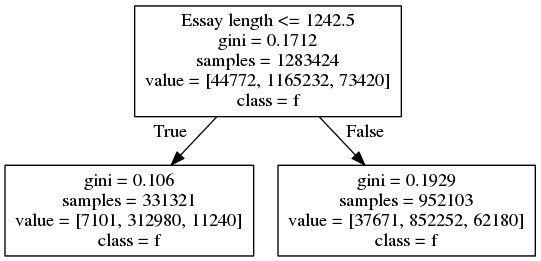

In [16]:
from sklearn.externals.six import StringIO  
import pydot 
from IPython.display import Image 
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data,feature_names=['Essay length'],class_names=['t','f']) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())  